## HOUSE DATA PRICE

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données

In [9]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Paramètres de visualisation pour jupyter

In [10]:
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 100

## Exploration des données

## Gestion des données manquantes
Visualisation des données manquantes

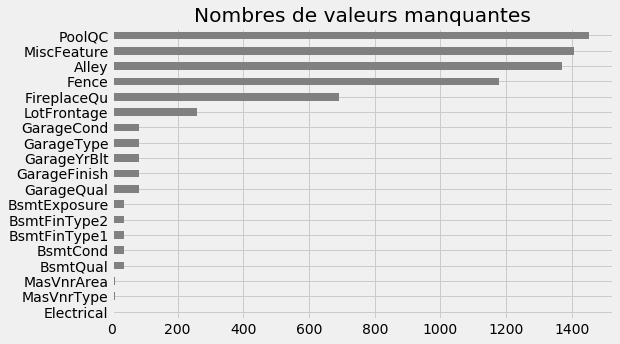

In [11]:
total_na = train.isna().sum().sort_values()
col_miss_values = (total_na[total_na > 0]).index
total_na[col_miss_values].plot(kind='barh',color='grey',figsize=(8,5),title="Nombres de valeurs manquantes")

On décide de supprimer les colonnes contenant plus de 15% de valeurs manquantes

In [12]:
values_na = total_na / train.shape[0]
cols_low_na = values_na[values_na < 0.15]
df_train = train[cols_low_na.index]

## Gestion des valeurs manquantes
- Que faire du GarageYrBlt ?
- Bsmt => Vérifier qu'il  n'y a pas de basement

### Question 1
Les variables restantes sont-elles corrélées à notre prédiction ? -> Visualisation boxplot pour les qualitatives et scatterplot pour les quantitatives ( --> matrice de corrélation )<br>
### Question 2
Est-ce que des variables nous apporte la même information ? -> Visualisation plot de corrélation ( --> matrice de corrélation )

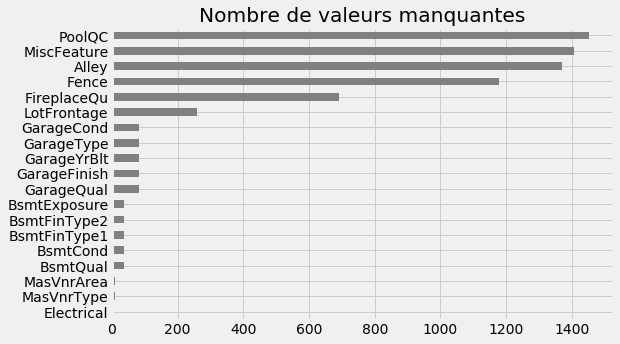

In [14]:
total_na = train.isna().sum().sort_values()
total_na[total_na > 0].plot(kind='barh',color='grey',figsize=(8,5),title="Nombre de valeurs manquantes")

### ( A CONFIRMER )
Le nombre de valeurs manquantes sont les mêmes pour les variables *Garage_*. Le manque d'informations provient de l'inexistence du Garage.
<br><br>
On décide de remplacer les n/a qualitatifs par un label "N/A"

In [ ]:
cols_replace_na_cat = ["GarageCond","GarageType","GarageFinish","GarageQual"]
df_train[cols_replace_na_cat] = df_train[cols_replace_na_cat].fillna('N/A')

## Séléction de features
Visualisations des corrélations

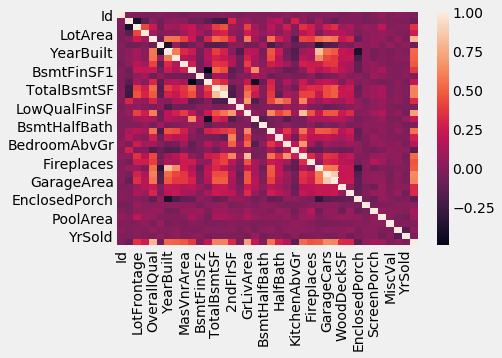

In [45]:
sns.heatmap(train.corr())

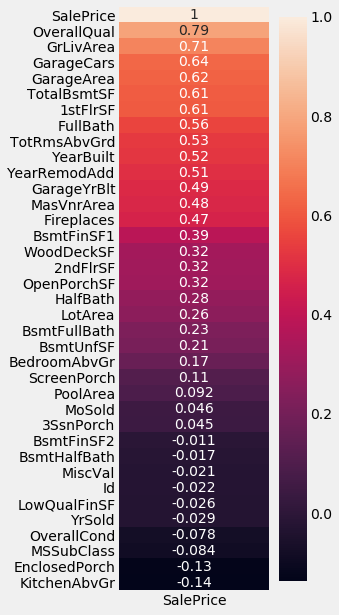

In [58]:
corr_price = df_train.corr()[['SalePrice']].sort_values('SalePrice',ascending=False)
# Visualisation 0.25 de corrélatio
#cols_corr = corr_price[corr_price >= 0.25].index
#df_train_corr = df_train[cols_corr]
plt.figure(figsize=(3,10))
sns.heatmap(corr_price,annot=True)

On garde les variables quantitatives corrélées à plus de 25%

In [61]:
cols_features = corr_price[corr_price < 0.25].index
df_train = df_train[cols_features]

## Création de features

## Transformations de valeurs

## Gestion des outliers

## Modèle d'apprentissage
- Définir un seuil final pour le test_size
- On a temporairement retiré *GarageYrBlt* et *MasVnrArea* dû aux valeurs manquantes non traitées

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [126]:
Y = df_train['SalePrice']
X = df_train.drop(['SalePrice','GarageYrBlt'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.predict(X_test)
lm.score(X_test,y_test)

0.8051177432334768